# Análise dos acidentes de trânsito ocasionados por animais nas rodovias federais do munícipio de Vitória da Conquista, Bahia, no ano de 2022

# 1. Introdução

Reduzir o número de acidentes de trânsito e suas consequências devastadoras nas rodovias brasileiras é um desafio complexo, mas é absolutamente essencial para a segurança pública e o bem-estar da sociedade. Isso porque, ano a ano vidas são perdidas em decorrência de acidentes no trânsito. E não é somente vida humana, mas também de animais que morrem atropelados. O Brasil historicamente teve um alto número de acidentes de trânsito. Em 2020, por exemplo, o país registrou mais de 155 mil acidentes com vítimas, resultando em cerca de 30 mil mortes.  Vários fatores contribuem para acidentes de trânsito, incluindo excesso de velocidade, distração ao volante, imprudência, falta de manutenção adequada de veículos e infraestrutura rodoviária inadequada. Mas um fator importante que contribue para esses acidentes são os animais na pista, e é sobre isso que esse projeto se desbruça.

# 2. Objetivo

* Análisar dados dos acidentes de trânsito ocasionados por animais nas rodovias federais do munícipio de Vitória da Conquista, Bahia, no ano de 2022, com a finalidade de entender as tendências e os padrões desses acidentes e obter insights.

# 3. Justificativa

* A análise de dados relacionados a acidentes de trânsito é muito importante, pois permite entender as tendências e os padrões dos acidentes e obter insights, como por exemplo identificar trechos de estradas com alta probabilidades de acidentes e atropelamento de animais nas rodovias federais e, a partir disso, será possível oferecer soluções que possibilitam ações preventivas e uma gestão de frotas mais sustentável e eficiente, tornando as estradas mais seguras e ambientalmente sustentável e salvando vidas.

# 4. Metodologia

Este é um projeto de análise de dados, que envolve a utilização das bibliotecas do python com objetivo de encontrar tendências e padrões nos dados e gerar insights. Para alcançar o objetivo proposto, o primeiro passo é importar as bibliotecas necessárias para construção do projeto. Em seguida, é feita a coleta dos dados. Logo após, uma análise dos dados inicial, com intuito de conhecer os dados e verificar possíveis inconsistências, tais como valores faltantes, valores inconsistentes, valores duplicados, presença de outliets, dentre outros. Depois, é feito a limpeza e o tratamento dos dados. Em seguida é realizado análise exploratória dos dados, com a finalidade de obter insigts para o time de negócios.

# 5. Importação das bibliotecas utilizadas ao longo de todo o projeto

In [20]:
import pandas as pd                                   # (Biblioteca que contém os comandos para ler as planilhas)
import numpy as np                                    # (Biblioteca que contém os comandos para realização de cálculos)
import matplotlib.pyplot as plt                       # (Para geração de gráficos)
import folium                                         # (Para criação de mapas)
from folium.plugins import HeatMap
import geopandas as gpd                               # (Para fazer análise geoespacial)

# 6. ETAPA I: Coleta de dados

## 6.1 Verificando a codificação do arquivo

In [ ]:
import chardet # Biblioteca

# Abrindo o arquivo em modo binário
with open('acidentes2022_todas_causas_tipos.csv', 'rb') as arquivo:
    resultado = chardet.detect(arquivo.read())

codificacao = resultado['encoding']

In [ ]:
# Exibindo a codificação
print("Codificação detectada:", codificacao)

## 6.2 Carregando e Visualizando a base de dados

In [3]:
# Lendo o arquivo CSV especificando a codificação

acidentes_transito_bra= pd.read_csv('acidentes2022_todas_causas_tipos.csv', delimiter=';', encoding='ISO-8859-1') 
acidentes_transito_bra


,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
0,405147,911178.0,2022-01-01,sábado,00:10:00,CE,222.0,"2,8",FORTALEZA,Sim,...,Masculino,1,0,0,0,"-3,73911117","-38,58687498",SPRF-CE,DEL01-CE,UOP01-DEL01-CE
1,405147,911179.0,2022-01-01,sábado,00:10:00,CE,222.0,"2,8",FORTALEZA,Sim,...,Masculino,0,0,1,0,"-3,73911117","-38,58687498",SPRF-CE,DEL01-CE,UOP01-DEL01-CE
2,405149,912796.0,2022-01-01,sábado,01:30:00,PE,104.0,63,CARUARU,Sim,...,Feminino,0,1,0,0,"-8,2698","-35,9803",SPRF-PE,DEL02-PE,UOP01-DEL02-PE
3,405149,912793.0,2022-01-01,sábado,01:30:00,PE,104.0,63,CARUARU,Sim,...,Masculino,0,0,1,0,"-8,2698","-35,9803",SPRF-PE,DEL02-PE,UOP01-DEL02-PE
4,405149,913204.0,2022-01-01,sábado,01:30:00,PE,104.0,63,CARUARU,Sim,...,Não Informado,0,0,0,0,"-8,2698","-35,9803",SPRF-PE,DEL02-PE,UOP01-DEL02-PE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
519018,516846,1133209.0,2022-07-31,domingo,09:54:00,CE,116.0,5,FORTALEZA,Sim,...,Não Informado,0,0,0,0,"-3,79654632","-38,50665092",SPRF-CE,DEL01-CE,UOP02-DEL01-CE
519019,516931,1133463.0,2022-11-17,quinta-feira,18:13:00,PR,277.0,"11,8",PARANAGUA,Sim,...,Masculino,0,0,1,0,"-25,56418984","-48,63272406",SPRF-PR,DEL01-PR,UOP05-DEL01-PR
519020,516931,1133462.0,2022-11-17,quinta-feira,18:13:00,PR,277.0,"11,8",PARANAGUA,Sim,...,Feminino,0,0,1,0,"-25,56418984","-48,63272406",SPRF-PR,DEL01-PR,UOP05-DEL01-PR
519021,517156,1134043.0,2022-03-23,quarta-feira,17:50:00,GO,70.0,470,ARAGARCAS,Sim,...,Masculino,1,0,0,0,"-15,89689927","-52,2380287",SPRF-GO,DEL04-GO,UOP02-DEL04-GO


## 6.3 Filtrando os dados somente do município de Vitória da Conquista

In [4]:
# Usando a função de filtro para selecionar apenas as linhas onde o município seja "VITORIA DA CONQUISTA"

acidentes_transito_vca = acidentes_transito_bra[acidentes_transito_bra['municipio'] == 'VITORIA DA CONQUISTA']
acidentes_transito_vca

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
28,405156,907663.0,2022-01-01,sábado,02:50:00,BA,116.0,"14,6",VITORIA DA CONQUISTA,Sim,...,Feminino,0,1,0,0,"-14,895167","-40,862907",SPRF-BA,DEL08-BA,UOP01-DEL08-BA
29,405156,907661.0,2022-01-01,sábado,02:50:00,BA,116.0,"14,6",VITORIA DA CONQUISTA,Sim,...,Masculino,1,0,0,0,"-14,895167","-40,862907",SPRF-BA,DEL08-BA,UOP01-DEL08-BA
30,405156,907663.0,2022-01-01,sábado,02:50:00,BA,116.0,"14,6",VITORIA DA CONQUISTA,Sim,...,Feminino,0,1,0,0,"-14,895167","-40,862907",SPRF-BA,DEL08-BA,UOP01-DEL08-BA
31,405156,907661.0,2022-01-01,sábado,02:50:00,BA,116.0,"14,6",VITORIA DA CONQUISTA,Sim,...,Masculino,1,0,0,0,"-14,895167","-40,862907",SPRF-BA,DEL08-BA,UOP01-DEL08-BA
32,405156,907663.0,2022-01-01,sábado,02:50:00,BA,116.0,"14,6",VITORIA DA CONQUISTA,Sim,...,Feminino,0,1,0,0,"-14,895167","-40,862907",SPRF-BA,DEL08-BA,UOP01-DEL08-BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513566,499856,NaN,2022-12-17,sábado,09:50:00,BA,116.0,"854,6",VITORIA DA CONQUISTA,Sim,...,Não Informado,0,0,0,0,"-15,086876","-41,012417",SPRF-BA,DEL08-BA,UOP01-DEL08-BA
513567,499856,NaN,2022-12-17,sábado,09:50:00,BA,116.0,"854,6",VITORIA DA CONQUISTA,Sim,...,Não Informado,0,0,0,0,"-15,086876","-41,012417",SPRF-BA,DEL08-BA,UOP01-DEL08-BA
513568,499856,1091186.0,2022-12-17,sábado,09:50:00,BA,116.0,"854,6",VITORIA DA CONQUISTA,Sim,...,Masculino,1,0,0,0,"-15,086876","-41,012417",SPRF-BA,DEL08-BA,UOP01-DEL08-BA
513569,499856,1091185.0,2022-12-17,sábado,09:50:00,BA,116.0,"854,6",VITORIA DA CONQUISTA,Sim,...,Masculino,1,0,0,0,"-15,086876","-41,012417",SPRF-BA,DEL08-BA,UOP01-DEL08-BA


## 6.4 Fazendo uma cópia da base de dados

In [5]:
# Fazendo uma cópia dos dados

acidentes_transito_vca1 = acidentes_transito_vca.copy()
acidentes_transito_vca1

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
28,405156,907663.0,2022-01-01,sábado,02:50:00,BA,116.0,"14,6",VITORIA DA CONQUISTA,Sim,...,Feminino,0,1,0,0,"-14,895167","-40,862907",SPRF-BA,DEL08-BA,UOP01-DEL08-BA
29,405156,907661.0,2022-01-01,sábado,02:50:00,BA,116.0,"14,6",VITORIA DA CONQUISTA,Sim,...,Masculino,1,0,0,0,"-14,895167","-40,862907",SPRF-BA,DEL08-BA,UOP01-DEL08-BA
30,405156,907663.0,2022-01-01,sábado,02:50:00,BA,116.0,"14,6",VITORIA DA CONQUISTA,Sim,...,Feminino,0,1,0,0,"-14,895167","-40,862907",SPRF-BA,DEL08-BA,UOP01-DEL08-BA
31,405156,907661.0,2022-01-01,sábado,02:50:00,BA,116.0,"14,6",VITORIA DA CONQUISTA,Sim,...,Masculino,1,0,0,0,"-14,895167","-40,862907",SPRF-BA,DEL08-BA,UOP01-DEL08-BA
32,405156,907663.0,2022-01-01,sábado,02:50:00,BA,116.0,"14,6",VITORIA DA CONQUISTA,Sim,...,Feminino,0,1,0,0,"-14,895167","-40,862907",SPRF-BA,DEL08-BA,UOP01-DEL08-BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513566,499856,NaN,2022-12-17,sábado,09:50:00,BA,116.0,"854,6",VITORIA DA CONQUISTA,Sim,...,Não Informado,0,0,0,0,"-15,086876","-41,012417",SPRF-BA,DEL08-BA,UOP01-DEL08-BA
513567,499856,NaN,2022-12-17,sábado,09:50:00,BA,116.0,"854,6",VITORIA DA CONQUISTA,Sim,...,Não Informado,0,0,0,0,"-15,086876","-41,012417",SPRF-BA,DEL08-BA,UOP01-DEL08-BA
513568,499856,1091186.0,2022-12-17,sábado,09:50:00,BA,116.0,"854,6",VITORIA DA CONQUISTA,Sim,...,Masculino,1,0,0,0,"-15,086876","-41,012417",SPRF-BA,DEL08-BA,UOP01-DEL08-BA
513569,499856,1091185.0,2022-12-17,sábado,09:50:00,BA,116.0,"854,6",VITORIA DA CONQUISTA,Sim,...,Masculino,1,0,0,0,"-15,086876","-41,012417",SPRF-BA,DEL08-BA,UOP01-DEL08-BA


## 6.5 Obtendo uma lista de todas as colunas do DataFrame

In [6]:
# Obtendo uma lista de todas as colunas do DataFrame
colunas = acidentes_transito_bra.columns.tolist()

# Exiba a lista de colunas
print(colunas)

['id', 'pesid', 'data_inversa', 'dia_semana', 'horario', 'uf', 'br', 'km', 'municipio', 'causa_principal', 'causa_acidente', 'ordem_tipo_acidente', 'tipo_acidente', 'classificacao_acidente', 'fase_dia', 'sentido_via', 'condicao_metereologica', 'tipo_pista', 'tracado_via', 'uso_solo', 'id_veiculo', 'tipo_veiculo', 'marca', 'ano_fabricacao_veiculo', 'tipo_envolvido', 'estado_fisico', 'idade', 'sexo', 'ilesos', 'feridos_leves', 'feridos_graves', 'mortos', 'latitude', 'longitude', 'regional', 'delegacia', 'uop']


# 7. ETAPA II: Verificando inconsistências nos dados

## 7.1 Dimensão/Tamanho dos dados

In [7]:
# Verificando quantidade de linhas e colunas

acidentes_transito_vca1.shape

(1566, 37)

## 7.2 Tipo dos dados

In [8]:
# Verificando o tipo dos dados

tipo_de_dados = pd.DataFrame(acidentes_transito_vca1.dtypes)
tipo_de_dados

,0
id,int64
pesid,float64
data_inversa,object
dia_semana,object
horario,object
uf,object
br,float64
km,object
municipio,object
causa_principal,object


## 7.3 Verificando existência de valores nulos

In [9]:
# Verificiando a existência de valores nulos

valores_nulos=pd.DataFrame(acidentes_transito_vca1.isnull().sum(),columns=['Números De Nulos'])
valores_nulos['Porcentagem (%)']=valores_nulos['Números De Nulos']/len(acidentes_transito_vca1)*100
valores_nulos

,Números De Nulos,Porcentagem (%)
id,0,0.000000
pesid,131,8.365262
data_inversa,0,0.000000
dia_semana,0,0.000000
horario,0,0.000000
uf,0,0.000000
br,0,0.000000
km,0,0.000000
municipio,0,0.000000
causa_principal,0,0.000000


* As colunas pesid, marca, ano e idade possuem 131, 99, 188 e 259 valores nulos, respectivamente.

 ## 7.4 Verificando a existência de dados duplicados

In [10]:
# Verificando a existência de dados duplicados

acidentes_transito_vca1[acidentes_transito_vca1.duplicated()]

,id,pesid,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop


In [11]:
# Verificando por outra opção

acidentes_transito_vca1.duplicated().any()

False

* Não há valores duplicados.

 ## 7.5 Conclusões

Foi dentificado os seguintes problemas:
    
* As colunas pesid, marca, ano e idade possuem 131, 99, 188 e 259 valores nulos, respectivamente.
* Não há valores duplicados.

# 8. ETAPA III: Limpeza e Tratamento dos Dados

## 8.1 Tratando NANs (Removendo as colunas com NANs)

* As colunas que contém os valores nulos não serão utilizadas na análise, por isso optei por removê-las.

In [12]:
# Obtendo uma lista de colunas que não contêm valores nulos
colunas_a_manter = acidentes_transito_vca1.columns[acidentes_transito_vca1.notna().all()].tolist()

# Usando o método drop para remover as colunas com valores nulos
acidentes_transito_vca2 = acidentes_transito_vca1[colunas_a_manter]
acidentes_transito_vca2



,id,data_inversa,dia_semana,horario,uf,br,km,municipio,causa_principal,causa_acidente,...,sexo,ilesos,feridos_leves,feridos_graves,mortos,latitude,longitude,regional,delegacia,uop
28,405156,2022-01-01,sábado,02:50:00,BA,116.0,"14,6",VITORIA DA CONQUISTA,Sim,Condutor Dormindo,...,Feminino,0,1,0,0,"-14,895167","-40,862907",SPRF-BA,DEL08-BA,UOP01-DEL08-BA
29,405156,2022-01-01,sábado,02:50:00,BA,116.0,"14,6",VITORIA DA CONQUISTA,Sim,Condutor Dormindo,...,Masculino,1,0,0,0,"-14,895167","-40,862907",SPRF-BA,DEL08-BA,UOP01-DEL08-BA
30,405156,2022-01-01,sábado,02:50:00,BA,116.0,"14,6",VITORIA DA CONQUISTA,Sim,Condutor Dormindo,...,Feminino,0,1,0,0,"-14,895167","-40,862907",SPRF-BA,DEL08-BA,UOP01-DEL08-BA
31,405156,2022-01-01,sábado,02:50:00,BA,116.0,"14,6",VITORIA DA CONQUISTA,Sim,Condutor Dormindo,...,Masculino,1,0,0,0,"-14,895167","-40,862907",SPRF-BA,DEL08-BA,UOP01-DEL08-BA
32,405156,2022-01-01,sábado,02:50:00,BA,116.0,"14,6",VITORIA DA CONQUISTA,Sim,Condutor Dormindo,...,Feminino,0,1,0,0,"-14,895167","-40,862907",SPRF-BA,DEL08-BA,UOP01-DEL08-BA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
513566,499856,2022-12-17,sábado,09:50:00,BA,116.0,"854,6",VITORIA DA CONQUISTA,Sim,Condutor deixou de manter distância do veículo...,...,Não Informado,0,0,0,0,"-15,086876","-41,012417",SPRF-BA,DEL08-BA,UOP01-DEL08-BA
513567,499856,2022-12-17,sábado,09:50:00,BA,116.0,"854,6",VITORIA DA CONQUISTA,Sim,Condutor deixou de manter distância do veículo...,...,Não Informado,0,0,0,0,"-15,086876","-41,012417",SPRF-BA,DEL08-BA,UOP01-DEL08-BA
513568,499856,2022-12-17,sábado,09:50:00,BA,116.0,"854,6",VITORIA DA CONQUISTA,Sim,Condutor deixou de manter distância do veículo...,...,Masculino,1,0,0,0,"-15,086876","-41,012417",SPRF-BA,DEL08-BA,UOP01-DEL08-BA
513569,499856,2022-12-17,sábado,09:50:00,BA,116.0,"854,6",VITORIA DA CONQUISTA,Sim,Condutor deixou de manter distância do veículo...,...,Masculino,1,0,0,0,"-15,086876","-41,012417",SPRF-BA,DEL08-BA,UOP01-DEL08-BA


In [13]:
# Verificiando novamente a existência de valores nulos

valores_nulos=pd.DataFrame(acidentes_transito_vca2.isnull().sum(),columns=['Números De Nulos'])
valores_nulos['Porcentagem (%)']=valores_nulos['Números De Nulos']/len(acidentes_transito_vca2)*100
valores_nulos

,Números De Nulos,Porcentagem (%)
id,0,0.0
data_inversa,0,0.0
dia_semana,0,0.0
horario,0,0.0
uf,0,0.0
br,0,0.0
km,0,0.0
municipio,0,0.0
causa_principal,0,0.0
causa_acidente,0,0.0


* Não há mais valores nulos.

# 9. ETAPA IV: Análise Exploratória dos Dados: Obtendo insigts para o time de negócios

**Algumas perguntas as serem respondidas para o time de negócios:**

* 1. Qual o número de acidentes envolvendo animais na pista nas rodovias federais de Vitória da Conquista em 2022?


* 2. Quais horários mais críticos que ocorreram acidentes envolvendo animais na pista nas rodovias federais de Vitória da Conquista em 2022?

* 3. Quais as condições meterológicas em que esses acidentes ocorreram?


* 4. Quais são os tipos de veículos mais frequentemente envolvidos em acidentes com "Animais na Pista"?


* 5. Existe uma sazonalidade nos acidentes com "Animais na Pista"? Isso varia ao longo do ano?


* 6. Qual é o tipo de acidente mais comum quando envolve "Animais na Pista"?


* 7. Existe uma tendência ao longo do dia para acidentes com "Animais na Pista"?

* 8. Quais os trechos na Br 116 em que esses acidentes ocorreram?

* 9. Com base nas informações fornecidas pela base de dados da Polícia Rodoviária Federal (PRF), crie um mapa que mostre as áreas com maior probabilidade de encontros com animais selvagens, supondo probabilidades de  [0.7, 0.4, 0.9], já que essa informação não é possível ser calculada levando-se em consideração os dados da base de dados fornecida.

* 10. Com nas informações fornecidas pela base de dados da Polícia Rodoviária Federal (PRF), crie um mapa de risco que identifique áreas críticas para atropelamentos de "Animais na Pista".


### 1.Qual o número de acidentes envolvendo animais na pista nas rodovias federais de Vitória da Conquista em 2022?


In [21]:
# Filtrar os dados para incluir apenas os acidentes com a causa "Animal na Pista"
acidentes_animais_na_pista = acidentes_transito_vca2[acidentes_transito_vca2['causa_acidente'] == 'Animais na Pista']

# Contar o número de acidentes por BR (rodovia)
contagem_por_br = acidentes_animais_na_pista.groupby('br').size().reset_index(name='numero_acidentes')

# Exibir a contagem por BR
contagem_por_br




,br,numero_acidentes
0,116.0,15


* Foram 15 acidentes envolvendo animais na pista na Br-116.

### 2. Quais horários mais críticos que ocorreram acidentes envolvendo animais na pista nas rodovias federais de Vitória da Conquista em 2022?

C:\Users\mauri\AppData\Local\Temp\ipykernel_12384\4277758427.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acidentes_animais_pista['hora_acidente'] = pd.to_datetime(acidentes_animais_pista['horario']).dt.hour


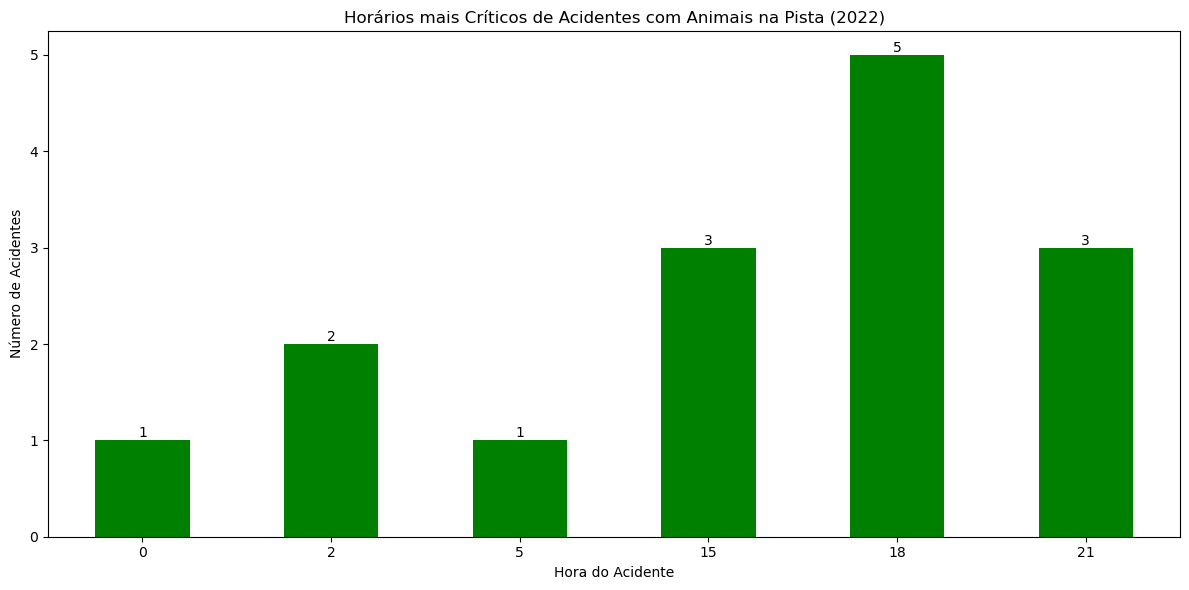

In [14]:
# Filtrando os dados para incluir apenas os acidentes com a causa "Animais na Pista"
acidentes_animais_pista = acidentes_transito_vca2[acidentes_transito_vca2['causa_acidente'] == 'Animais na Pista']

# Extraindo a hora do horário do acidente
acidentes_animais_pista['hora_acidente'] = pd.to_datetime(acidentes_animais_pista['horario']).dt.hour

# Contando o número de acidentes em cada hora
contagem_por_hora = acidentes_animais_pista['hora_acidente'].value_counts().sort_index()

# Criando o gráfico de barras com rótulos (valores) e barras verdes
plt.figure(figsize=(12, 6))
bars = contagem_por_hora.plot(kind='bar', color='green')  # Trocamos a cor para verde
plt.xlabel('Hora do Acidente')
plt.ylabel('Número de Acidentes')
plt.title('Horários mais Críticos de Acidentes com Animais na Pista (2022)')
plt.xticks(rotation=0)

# Adicionando rótulos (valores) acima das barras
for bar in bars.patches:
    plt.annotate(f'{bar.get_height()}', 
                 (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                 ha='center', va='bottom')

plt.tight_layout()

# Exibindo o gráfico
plt.show()



* Os horários mais críticos em que esses acidentes ocorreram foram 15h, 18h e 21h.

### 3. Quais as condições meterológicas em que esses acidentes ocorreram?

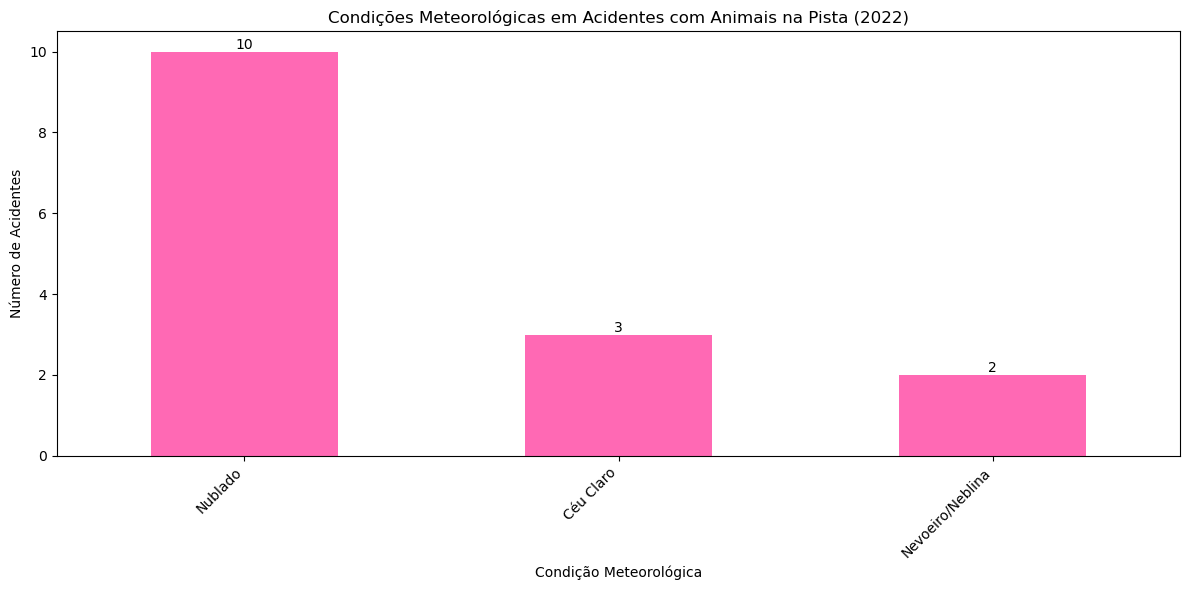

In [28]:
# Filtrando os dados para incluir apenas os acidentes com a causa "Animais na Pista"
acidentes_animais_pista = acidentes_transito_vca2[acidentes_transito_vca2['causa_acidente'] == 'Animais na Pista']

# Contando o número de acidentes por condição meteorológica
contagem_por_condicao = acidentes_animais_pista['condicao_metereologica'].value_counts()

# Criando o gráfico de barras com rótulos (valores) e barras "bright pink"
plt.figure(figsize=(12, 6))
bars = contagem_por_condicao.plot(kind='bar', color='hotpink')  # Trocamos a cor para "hotpink"
plt.xlabel('Condição Meteorológica')
plt.ylabel('Número de Acidentes')
plt.title('Condições Meteorológicas em Acidentes com Animais na Pista (2022)')
plt.xticks(rotation=45, ha='right')

# Adicionando rótulos (valores) acima das barras
for i, v in enumerate(contagem_por_condicao):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()

# Exibindo o gráfico
plt.show()



* A maioria dos acidentes ocorreram quando o tempo estava nublado.

### 4.  Quais são os tipos de veículos mais frequentemente envolvidos em acidentes com "Animais na Pista"?

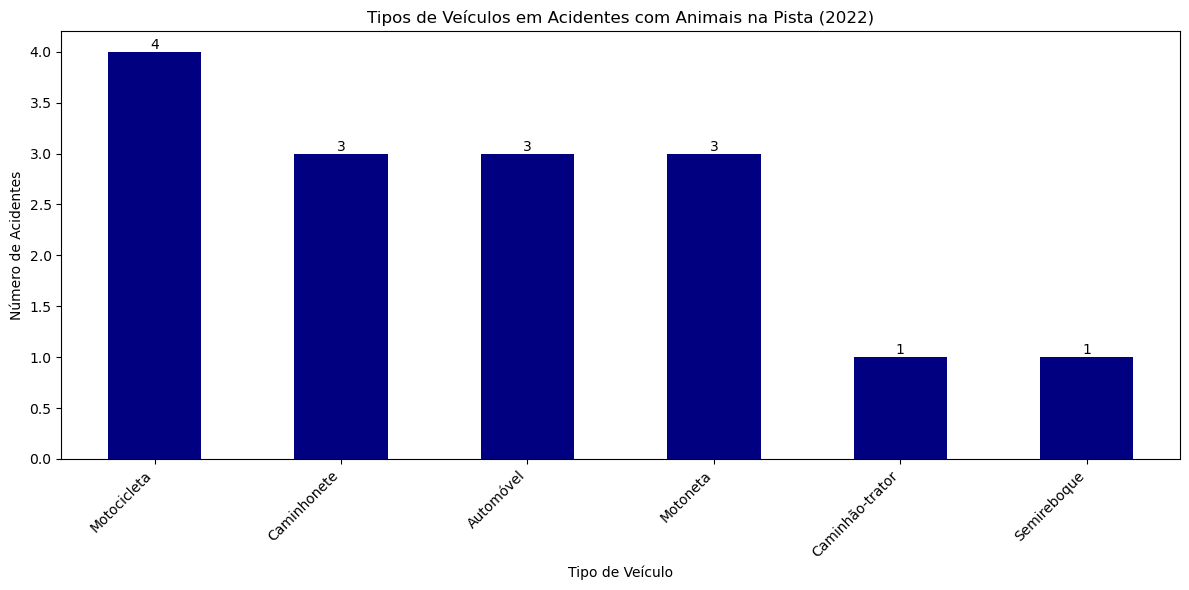

In [30]:
# Filtrando os dados para incluir apenas os acidentes com a causa "Animais na Pista"
acidentes_animais_pista = acidentes_transito_vca2[acidentes_transito_vca2['causa_acidente'] == 'Animais na Pista']

# Contando o número de acidentes por tipo de veículo
contagem_por_tipo_veiculo = acidentes_animais_pista['tipo_veiculo'].value_counts()

# Criando o gráfico de barras com a cor "navy blue"
plt.figure(figsize=(12, 6))
bars = contagem_por_tipo_veiculo.plot(kind='bar', color='navy')
plt.xlabel('Tipo de Veículo')
plt.ylabel('Número de Acidentes')
plt.title('Tipos de Veículos em Acidentes com Animais na Pista (2022)')
plt.xticks(rotation=45, ha='right')

# Adicionando rótulos (valores) acima das barras
for i, v in enumerate(contagem_por_tipo_veiculo):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()

# Exibindo o gráfico
plt.show()


* Os tipos de veiculos mais frequentes envolvendo animais na pista na Br-116 oram motocicleta, caminhonete, automóvel e mononeta.

### 5. Existe uma sazonalidade nos acidentes com "Animais na Pista"? Isso varia ao longo do ano?

C:\Users\mauri\AppData\Local\Temp\ipykernel_12384\2671138414.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acidentes_animais_na_pista['mes'] = pd.to_datetime(acidentes_animais_na_pista['data_inversa']).dt.month


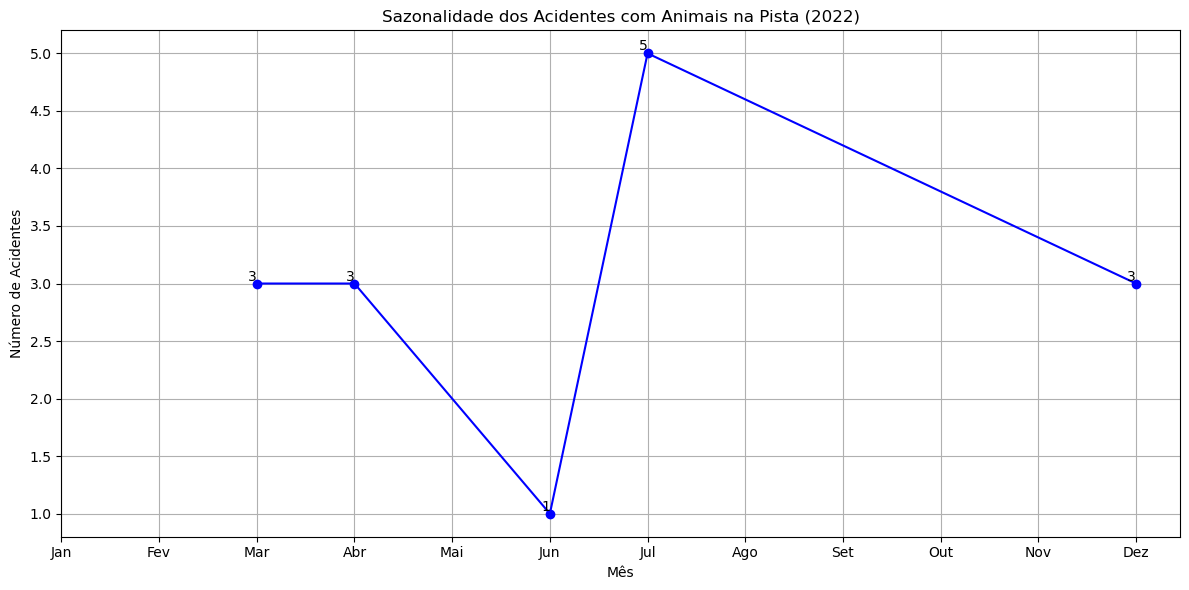

In [15]:
# Filtrando as linhas onde a coluna 'causa_acidente' é igual a 'Animais na Pista'
acidentes_animais_na_pista = acidentes_transito_vca2[acidentes_transito_vca2['causa_acidente'] == 'Animais na Pista']

# Extraindo o mês da coluna 'data_inversa'
acidentes_animais_na_pista['mes'] = pd.to_datetime(acidentes_animais_na_pista['data_inversa']).dt.month

# Contando o número de ocorrências em cada mês
contagem_por_mes = acidentes_animais_na_pista['mes'].value_counts().sort_index()

# Criando o gráfico de linha
plt.figure(figsize=(12, 6))  # Ajustando o tamanho do gráfico 

# Plotando o gráfico de linha com rótulos de valor
plt.plot(contagem_por_mes.index, contagem_por_mes.values, marker='o', color='blue', linestyle='-')

# Adicionando rótulos de valor em cada ponto do gráfico
for x, y in zip(contagem_por_mes.index, contagem_por_mes.values):
    plt.text(x, y, str(y), ha='right', va='bottom', fontsize=10)

plt.title('Sazonalidade dos Acidentes com Animais na Pista (2022)')
plt.xlabel('Mês')
plt.ylabel('Número de Acidentes')
plt.xticks(range(1, 13), ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez'])
plt.grid(True)
plt.tight_layout()
plt.show()


* A maioria dos acidentes ocorram no mês de julho.

### 6. Qual é o tipo de acidente mais comum quando envolve "Animais na Pista"?

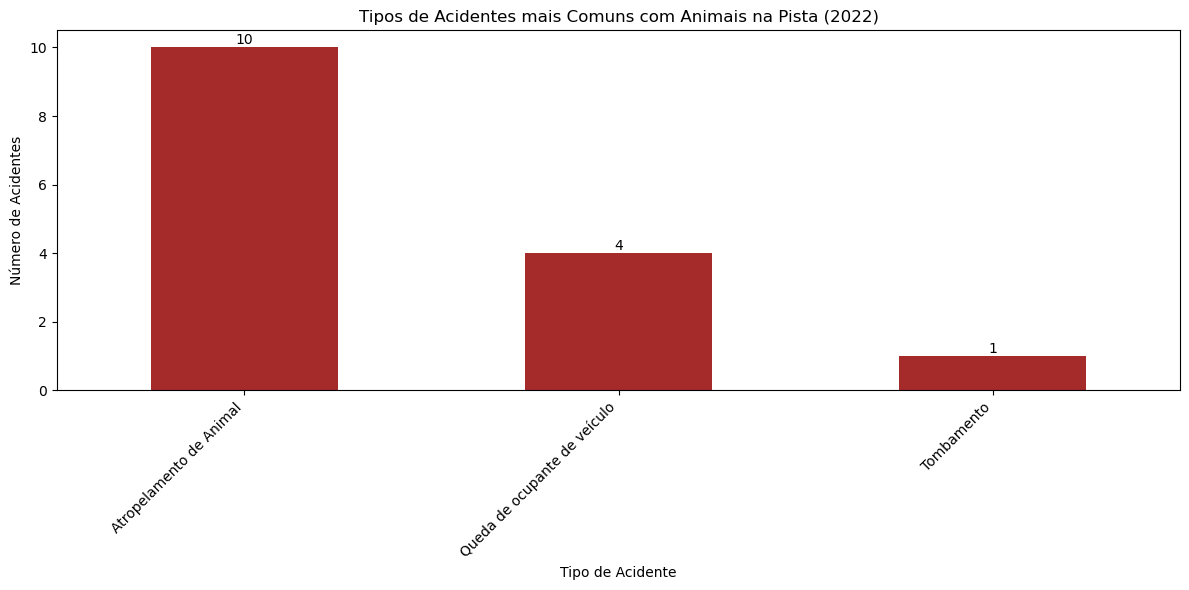

In [33]:
# Filtrando os dados para incluir apenas os acidentes com a causa "Animais na Pista"
acidentes_animais_pista = acidentes_transito_vca2[acidentes_transito_vca2['causa_acidente'] == 'Animais na Pista']

# Contando o número de acidentes por tipo de acidente
contagem_por_tipo_acidente = acidentes_animais_pista['tipo_acidente'].value_counts()

# Criando o gráfico de barras com a cor "brown" (marrom)
plt.figure(figsize=(12, 6))
contagem_por_tipo_acidente.plot(kind='bar', color='brown') 
plt.xlabel('Tipo de Acidente')
plt.ylabel('Número de Acidentes')
plt.title('Tipos de Acidentes mais Comuns com Animais na Pista (2022)')
plt.xticks(rotation=45, ha='right')

# Adicionando rótulos (valores) acima das barras
for i, v in enumerate(contagem_por_tipo_acidente):
    plt.text(i, v, str(v), ha='center', va='bottom')

plt.tight_layout()

# Exibindo o gráfico
plt.show()



* O tipo mais comum de acidentes envolvendo animais na pista é o atropelamento de animais.

### 7. Existe uma tendência ao longo do dia para acidentes com "Animais na Pista"?

C:\Users\mauri\AppData\Local\Temp\ipykernel_7400\3383698.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  acidentes_animais_na_pista['hora'] = pd.to_datetime(acidentes_animais_na_pista['horario']).dt.hour


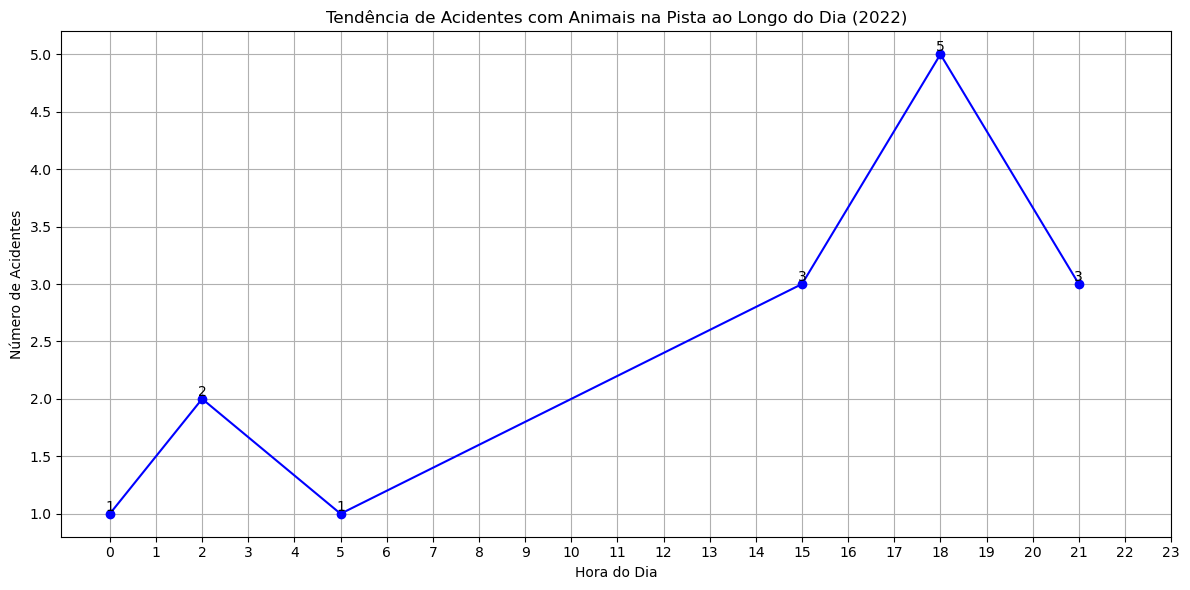

In [68]:
# Filtrando as linhas onde a coluna 'causa_acidente' é igual a 'Animais na Pista'
acidentes_animais_na_pista = acidentes_transito_vca2[acidentes_transito_vca2['causa_acidente'] == 'Animais na Pista']

# Extraindo a hora da coluna 'horario'
acidentes_animais_na_pista['hora'] = pd.to_datetime(acidentes_animais_na_pista['horario']).dt.hour

# Contando o número de ocorrências em cada hora do dia
contagem_por_hora = acidentes_animais_na_pista['hora'].value_counts().sort_index()

# Criando o gráfico de linha
plt.figure(figsize=(12, 6))  # Ajustando o tamanho do gráfico conforme necessário

# Plotando o gráfico de linha com rótulos de valor
plt.plot(contagem_por_hora.index, contagem_por_hora.values, marker='o', color='blue', linestyle='-')

# Adicionando rótulos de valor em cada ponto do gráfico
for x, y in zip(contagem_por_hora.index, contagem_por_hora.values):
    plt.text(x, y, str(y), ha='center', va='bottom', fontsize=10)

plt.title('Tendência de Acidentes com Animais na Pista ao Longo do Dia (2022)')
plt.xlabel('Hora do Dia')
plt.ylabel('Número de Acidentes')
plt.xticks(range(24))
plt.grid(True)
plt.tight_layout()
plt.show()


* A maioria dos acidentes aconteceram as 18h.

### 8. Quais os trechos na Br-116 em que esses acidentes ocorreram?

In [16]:
# Filtrando os dados para incluir apenas os acidentes com a causa "Animais na Pista"
acidentes_animais_pista = acidentes_transito_vca2[acidentes_transito_vca2['causa_acidente'] == 'Animais na Pista']

# Criando um mapa centrado nas coordenadas de Vitória da Conquista, Bahia
mapa = folium.Map(location=[-14.8486, -40.7851], zoom_start=12)

# Função para converter coordenadas em formato com vírgula para ponto flutuante
def parse_coordinates(coord):
    try:
        return float(coord.replace(',', '.'))
    except ValueError:
        return None

# Criando um dicionário para rastrear o número de acidentes em cada trecho
trecho_acidentes = {}

# Adicionando marcadores para cada local de acidente e contar o número de acidentes em cada trecho
for index, row in acidentes_animais_pista.iterrows():
    latitude = parse_coordinates(row['latitude'])
    longitude = parse_coordinates(row['longitude'])
    
    if latitude is not None and longitude is not None:
        trecho = f"BR-116, KM {row['km']} - {row['municipio']}"
        if trecho in trecho_acidentes:
            trecho_acidentes[trecho] += 1
        else:
            trecho_acidentes[trecho] = 1
        
        folium.Marker(
            location=[latitude, longitude],
            popup=f"{trecho}<br>Número de Acidentes: {trecho_acidentes[trecho]}",
            icon=folium.Icon(icon='cloud')
        ).add_to(mapa)

# Exibindo o mapa no Jupyter Notebook
mapa

# Para salvar o mapa em um arquivo HTML: mapa.save('mapa_acidentes.html')  
# Para visualizar o mapa no navegador: !start mapa_acidentes.html

* Pelo mapa, tendo em vista a latitude e longitude, é possível observar que dois acidentes envolvendo animais na pista ocorreram no Km 827,4, três no KM 827,8, um no KM 28, dois no KM 20,8, um no KM 805, um no Km 869, 3 no KM 860 e por ai vai.

### 9. Com base nas informações fornecidas pela base de dados da Polícia Rodoviária Federal (PRF), crie um mapa que mostre as áreas com maior probabilidade de encontros com animais selvagens, supondo probabilidades de  [0.7, 0.4, 0.9], já que essa informação não é possível ser calculada levando-se em consideração os dados da base de dados fornecida.

In [36]:
# Criando um mapa centrado na BR-116
mapa_probabilidade = folium.Map(location=[-14.8486, -40.7851], zoom_start=9)

# Criando um DataFrame com dados hipotéticos de probabilidade
data = {
    'latitude': [-14.8486, -14.9, -14.95],
    'longitude': [-40.7851, -40.8, -40.85],
    'probabilidade': [0.7, 0.4, 0.9]
}
df_probabilidade = pd.DataFrame(data)

# Adicionando marcadores para as áreas de risco com base na probabilidade calculada
for index, row in df_probabilidade.iterrows():
    latitude = row['latitude']
    longitude = row['longitude']
    probabilidade = row['probabilidade']
    
    # Adicionando marcadores coloridos com base na probabilidade
    if probabilidade > 0.5:
        color = 'red'
    else:
        color = 'green'
    
    folium.CircleMarker(
        location=[latitude, longitude],
        radius=5,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
        popup=f"Probabilidade: {probabilidade}",
    ).add_to(mapa_probabilidade)

# Exibindo o mapa 
mapa_probabilidade

# Para salvar o mapa em um arquivo HTML: mapa_probabilidade.save("mapa_probailidade.html")
# Para visualizar o mapa no navegador: !start mapa_probabilidade.html

* Os pontos em vermelhos no mapa representam as áreas de riscos, baseado na probabilidade fornecida.

### 10. Com nas informações fornecidas pela base de dados da Polícia Rodoviária Federal (PRF), crie um mapa de risco que identifique áreas críticas para atropelamentos de "Animais na Pista".

In [29]:
# Criando um mapa centrado em Vitória da Conquista, Bahia
mapa = folium.Map(location=[-14.8486, -40.7851], zoom_start=10)

# Filtrando os acidentes envolvendo "Animais na Pista"
animais_na_pista = acidentes_transito_vca2[acidentes_transito_vca2['causa_acidente'] == 'Animais na Pista']

# Convertendo as colunas de latitude e longitude para float
animais_na_pista['latitude'] = animais_na_pista['latitude'].str.replace(',', '.').astype(float)
animais_na_pista['longitude'] = animais_na_pista['longitude'].str.replace(',', '.').astype(float)

# Criando uma lista de coordenadas (latitude e longitude) dos acidentes
coordenadas = list(zip(animais_na_pista['latitude'], animais_na_pista['longitude']))

# Adicionando uma camada de mapa de calor
HeatMap(coordenadas).add_to(mapa)

# Exibir o mapa interativo
mapa

# Para salvar o mapa em um arquivo HTML: mapa.save("mapa.html") 
# Para visualizar o mapa no navegador: !start mapa.html

C:\Users\mauri\AppData\Local\Temp\ipykernel_12384\1696369968.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  animais_na_pista['latitude'] = animais_na_pista['latitude'].str.replace(',', '.').astype(float)
C:\Users\mauri\AppData\Local\Temp\ipykernel_12384\1696369968.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  animais_na_pista['longitude'] = animais_na_pista['longitude'].str.replace(',', '.').astype(float)


# 10. Conclusões

* No ano de 2022 foram 15 acidentes envolvendo animais nas rodovias federais de Vitória da Conquista.



* Os horários mais críticos em que esses acidentes ocorreram foram as 15h, 18h e 21h.


* A maioria dos acidentes envolvendo animais ocorreram quando o tempo estava nublado.


* Os tipos de veículos mais frequentemente envolvidos em acidentes com animais na pista foram motocicletas, caminhonete, automóvel e motoneta.


* A maioria dos acidentes ocorreram no mês de julho.



* O tipo de acidente mais comum quando envolve animais na pista é o atropelamento de animal.



* A maioria dos acidentes acoteceram as 18h.


* Pelo mapa, tendo em vista a latitude e longitude, é possível observar que dois acidentes envolvendo animais na pista ocorreram no Km 827,4, três no KM 827,8, um no KM 28, dois no KM 20,8, um no KM 805, um no Km 869, 3 no KM 860 e por ai vai.


* Os dois últimos mapas mostram, respectivamente, as áreas com maior probabilidade de encontros com animais selvagens com base na probabilidade fornecida e as áreas críticas para atropelamentos de animais na pista.